<a href="https://colab.research.google.com/github/BechirMETTALI/ProjectsRep/blob/master/DM_MNP_S2D_Frecon_Mettali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Méthodes numériques probabilistes - Devoir Maison



## Consignes
* Ce devoir est à réaliser seul ou en binôme (du même groupe). 
* Le devoir est à rendre dans un unique fichier python notebook (.ipynb)
* Si le devoir est réalisé en binôme, ne déposer qu'un seul fichier sur madoc
* Nommer le fichier DM_MNP_Groupe_NOM1_NOM2.ipynb (groupe = APN, S2D ou MACS-IS)
* Indiquer ci-dessous le ou les noms des auteurs 




## Auteur(s) : Gauthier Frécon et Bechir Mettali

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from math import *
import numpy as  np   
import scipy as sp
import scipy.special as spc
import scipy.stats as sps
from pylab import *
import numpy.random as rnd


On désire utiliser la méthode de rejet pour simuler une variable aléatoire de densité
\begin{equation*}
  f_a(x) = a f(x) = a e^{-\sqrt{1+x^2}} 1_{x>0}
\end{equation*}
où $a>0$ est une constante inconnue, pour laquelle il n'existe pas de
formule analytique simple. On utilise comme loi instrumentale la loi
exponentielle standard, qui est de densité $g(x)=e^{-x} 1_{x>0}$.

> **Question 1.** En utilisant l'encadrement pour $x>0$, $x \le \sqrt{1+x^2}
\le x+1$, montrer que $1\le a\le e$.



1)
\begin{array}{l}
x \leq \sqrt{1+x^{2}} \leq1+x \quad \forall x>0\\
a e^{-x} \geqslant a e^{-\sqrt{1+x^{2}}} \geqslant a e^{-x-1} \\
\int_{0}^{+\infty} a e^{-x}d x \geqslant \int_{0}^{+\infty} f_{a}(x) d x \geqslant \int_{0}^{+\infty} a e^{-1} e^{-x} d x \\
\Rightarrow a \geqslant 1 \geqslant a e^{-1} \\
\Rightarrow 1 \leq a \leq e
\end{array}


> **Question 2.**
Ecrire une fonction qui retourne $n$ réalisations indépendantes de la
loi de densité $f_a$. Vous n'avez pas besoin de connaître la valeur de
la constante $a$ mais seulement de connaître une constante $A$ telle que $A\ge
\sup_{x>0} \frac{f(x)}{g(x)}$. On utilise alors la majoration $f_a(x) \le M g(x)$ avec $M= aA$. La condition d'acceptation $M g(Y) U \le f_a(Y)$ est alors équivalente à $A g(Y) U \le f(Y)$ avec $Y$ de densité $g$ et $U$ uniforme sur $(0,1)$.
En utilisant un histogramme, et le graphe de la fonction $f$, estimer graphiquement la valeur de $a$.


2)
\begin{aligned}
\text {On a  }
&x \leq \sqrt{1+x^{2}} \quad \forall x>0\\
&-x \geq-\sqrt{1+x^{2}}\\
&\text { Donc } e^{-x} \geqslant e^{-\sqrt{1+x^{2}}}\\
&\text  1 \geqslant \frac{f(x)}{g(x)} \quad \forall x>0\\
&\text { D'où }{A}=1
\end{aligned}

In [4]:
def f(x):
  return( np.exp( -sqrt(1+x**2) ) )

def rejet_fa(n):
  vect_fa = np.zeros(n)
  for i in range(n):
    z=1
    f_x=0
    while z>=f_x:
      x = rnd.exponential()  
      u = rnd.uniform()
      z=np.exp(-x)*u
      f_x=f(x)

    vect_fa[i]=x
  return(vect_fa)



In [5]:
simu_fa = rejet_fa(10000)
X_interv = np.arange(0,8,0.01)
v_fa = f(X_interv)

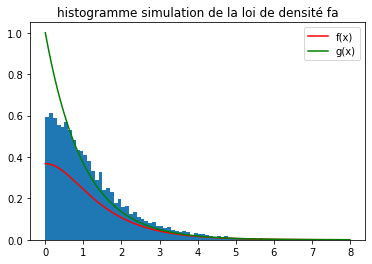

In [ ]:
plt.figure()
plt.plot( X_interv, v_fa, 'r-', label="f(x)");
plt.plot(X_interv, np.exp(-X_interv), "g-", label="g(x)")
plt.hist(vect_fa, bins=np.arange(0,8,0.1),density=1);
plt.legend()
plt.title("histogramme simulation de la loi de densité fa");


>L'histogramme nous donne une approximation de la densité. On lit ainsi à l'origine $f_{a}(0) = 0,6$
On estime ensuite a par:
\begin{array}{l}
\frac{f_{a}(0)}{f(0)} \approx \frac{0,6}{0,36} \\
\Rightarrow a \approx 1,66
\end{array}

> **Question 3.**
Ecrire une fonction <code>temprej(n)</code> qui renvoie un vecteur $T$ de taille $n$,
tel que $T_i$ soit le nombre de variables instrumentales, de densité
$g$, qu'il a fallu générer pour obtenir la $i$ ème variable de densité
$f_a$. Ce vecteur est donc un vecteur de composantes i.i.d. de même loi géométrique $
geo(p=1/M)$. En déduire une estimation de $a$ en
fonction de la moyenne empirique $\bar{T}_n = \frac1{n} \sum_{i=1}^n T_i$.

In [6]:
def temprej(n):
  T= np.zeros(n)
  for i in range(n):
    z=1
    f_x=0
    c=0
    while z>=f_x:
      x = rnd.exponential()  
      u = rnd.uniform()
      z=np.exp(-x)*u
      f_x=f(x)
      c+=1

    T[i]=c
  return(T)


In [ ]:
n = 10000
T = temprej(n)
mean_T = np.mean(T)
M = mean_T 
sigma_n = np.std(T)
print("estimation a: {}".format(M))


estimation a: 1.6536




On sait que $E(T)=1/p=M$ la moyenne du vecteur T nous donne donc des estimations entre 1.6 et 1.7 ce qui est cohérent avec la valeur calculée graphiquement précedemment.



> **Question 4.** On considère l'intervalle de confiance asymptotique donné par
la combinaison classique du théorème central limite, de
l'approximation $\sigma_n^2$ de la variance de la loi géométrique par la variance
empirique de $T$, et du lemme de Slutsky:
$$
  IC(n,\alpha)=\left[\bar{T}_n - q_{1-\alpha/2} \frac{\sigma_n}{\sqrt{n}},\bar{T}_n + q_{1-\alpha/2} \frac{\sigma_n}{\sqrt{n}}\right]\,.
$$
Donner les intervalles de confiance obtenus pour $\alpha=0.05$ et $n=50,100,1000$.


on $q_{1-\alpha/2}$  le quantile de niveau $(1-\alpha/2)$ avec $\alpha = 0.05$ pour la loi normale est 1.96.

In [ ]:
print("intervalle de confiance au niveau 0.05:")

def IC(n):
  T = temprej(n)
  a = np.mean(T) - 1.96*(np.var(T))/np.sqrt(n)
  b = np.mean(T) + 1.96*(np.var(T))/np.sqrt(n)
  return([a, b])

print("IC n=50: {} \nIC n=100: {} \nIC n=1000: {}".format(IC(50), IC(100), IC(1000)) )

intervalle de confiance au niveau 0.05:
IC n=50: [1.3424302428895867, 2.0575697571104135] 
IC n=100: [1.3473396, 1.6726604] 
IC n=1000: [1.638019095474459, 1.7839809045255413]


  $\def\esp#1{\left\{#1\right\}} \def\etc#1{\left[#1\right]} \def\esp#1{\mathbb{E}\left[#1\right]}
  $
  
  > **Question 5.** On désire utiliser maintenant les intervalles de
  confiances non asymptotiques.
  
  >Soit $X$ une variable de loi géométrique de paramètre $p\in (0,1)$
  et $Z=X-\esp{X}$. Montrer que si $t<-log(1-p)$,
  \begin{equation*}
    \psi_Z(t)=\log\esp{e^{tZ}}= -t/p + \log(p) + t -\log(1-(1-p)e^t) 
  \end{equation*}
  et que $\psi_Z(t)=+\infty$ sinon.
  
  >Montrer que la dérivée seconde $ \psi_Z''(t)$ est croissante sur $]-\infty,-\log(1-p)[$. En
  déduire que si $p\ge 1/2$, alors $X\in SE(\tau^2=2,b)$ avec $(1-p)
  e^{1/b} = 0.5$.

  > En déduire des intervalles de confiance de niveau $1-\alpha$ pour $a$. Les comparer aux intervalles de confiance précédents pour $n=50,100,1000$ en
  utilisant le même échantillon de taille $n $ de géométriques à
  chaque fois bien sûr.


$ \text{Soit} $ $B = ]-\infty,-\log(1-p)[$


 5)
 \begin{aligned}
{\psi}_{z}(t) &=\log \left(\mathbb{E}\left(e^{t z}\right)\right) \\
\mathbb{E}\left(e^{t z}\right) &=\sum_{k=1}^{+\infty} \rho(1-p)^{k-1} e^{t\left(k-\frac{1}{\rho}\right)} \\
&=p \sum_{k=1}^{+\infty}\left((1-p) e^{t}\right)^{k-1} \times e^{t-\frac{t}{p}} \\
&=p e^{t-t / p} \cdot \frac{1}{1-(1-p) e^{t}}
\end{aligned}

\begin{array}{l}
\text{si  } t<-log(1-p) \text{ alors } 
\psi_{z}(t)=\log \left(\mathbb{E}\left(e^{t z}\right)\right)=-\frac{t}{p}+t+\log (p)-\log (1-(1-p) e^t) \\
\text{sinon } \mathbb{E}\left(e^{t z}\right)=+\infty \text{ donc } \psi_{z}(t) \text { aussi. }
\end{array}


On trouve après deux dérivations: $\psi^{\prime \prime}(t)=\frac{-(p-1) e^{t}}{\left((p-1) e^{t}+1\right)^{2}}$ On verifie qu'elle est croissante sur notre intervalle B.

\begin{array}{l}
\left.(1-p) e^{\frac{1}{b}}=0,5 \Rightarrow \frac{1}{b} \in\right]-\infty,-\log (1-p)[ \\
\forall x \in\left[0, \frac{1}{b}\right] \quad \psi^{\prime \prime}(x) \leqslant \psi^{\prime \prime}\left(\frac{1}{b}\right)
\end{array}

\begin{aligned}
\text{On intégre deux fois:}\\
&\int^{x}_{0} \int^{x}_{0} \psi^{\prime \prime}(t) d t \leq x^{2} \psi^{\prime \prime}\left(\frac{1}{b}\right)\leq x^{2}\\


&\text{alors }\psi(x) \leq x^{2}\\

&M_{x-\mathbb{E}(x)}{(t)} \leqslant e^{t^{2} \frac{\tau^{2}}{2}} \quad \text{quand } \tau^{2}=2


\text { et } \forall|t| \leq \frac{1}{b}

\end{aligned}

$\text{Par la méthode de Chernoff:}$
\begin{aligned}
\forall t \in\left[0, \frac{1}{b}\right], \mathbb{P}(|\bar{X}-m|>t) \leq 2 e^{-\frac{n t^{2}}{2 \tau^{2}}} \\
\text{Alors } P\left(\left|\hat{I}_{n}-I\right| \leq t\right) \geqslant 1-2 e^{-\frac{n t^{2}}{2 \tau^{2}}}\\
\alpha=2 e^{-\frac{nt^{2}}{2 \tau^{2}}} \Leftrightarrow t=\sqrt{\frac{2 \tau^{2} \ln \left(\frac{2}{\alpha}\right)}{2}}.\\
P\left(I \in\left[\hat{I}_{n} \pm \sqrt{\frac{2 \tau^{2} \ln \left(\frac{2}{\alpha}\right)}{\sqrt{n}}}\right]\right) \quad \geqslant 1-\alpha
\end{aligned}

In [8]:
tau=np.sqrt(2)
print("intervalle de confiance au niveau 0.05 pour cette méthode:")

def IC_chernoff(n):
  T = temprej(n)
  a = np.mean(T) - np.sqrt( 2*(tau**2)*np.log(2/0.05) / np.sqrt(n) ) 
  b = np.mean(T) + np.sqrt( 2*(tau**2)*np.log(2/0.05) / np.sqrt(n) )
  return([a, b])

print("IC n=50: {} \nIC n=100: {} \nIC n=1000: {}".format(IC_chernoff(50), IC_chernoff(100), IC_chernoff(1000)) )


#On voit immédiatement que les intervalles sont moins pertinents que ceux proposés à  la question 4 

intervalle de confiance au niveau 0.05 pour cette méthode:
IC n=50: [0.1754428562403787, 3.0645571437596217] 
IC n=100: [0.23527707618338956, 2.66472292381661] 
IC n=1000: [0.9549111012818717, 2.321088898718128]


> **Question 6.**
On va utiliser les méthodes de Monte Carlo pour calculer
  la constante
  \begin{equation*}
    I=\frac1{a} = \int_0^\infty e^{-\sqrt{1+x^2}}\, dx
  \end{equation*}
  On écrit pour cela $I=\esp{f(X)}$ avec $X$ une va de loi exponentielle
    standard, et $f(x)=\exp(x-\sqrt{1+x^2}) 1_{x>0}$.
  En utilisant l'encadrement pour $x>0$, $x \le \sqrt{1+x^2}
\le x+1$, donner un encadrement pour $I$ et un encadrement pour $var(f(X))$.

6)

$\text{Pour I:}$
\begin{aligned}
\forall x>0 \int_{0}^{+\infty} e^{-(1+x)} d x \leq \int_{0}^{+\infty} e^{-\sqrt{1+x^{2}}} d x \leq \int_{0}^{+\infty} e^{-2} d x \\
\end{aligned}

$\text{par intégration:  } e^{-1} \leq I \leq 1$
\begin{aligned}
&\text{Pour la variance de la fonction f :}\\
\text{On a }e^{-1} \leq f(x) \leq 1\\
\end{aligned}
On prends le cas d'un échantillon equilibré en 1 et $e^{-1}$:
\begin{aligned}
V & \leq \frac{1}{n} \times \frac{n}{2}\left(1-\frac{1+e^{-1}}{2}\right)^{2}+\frac{1}{n} \times \frac{n}{2}\left(e^{-1}-\frac{1+e^{-1}}{2}\right)^{2} \\
& \leqslant\left(\frac{1-e^{-t}}{2}\right)^{2} \geqslant V(f(x)) \\
\text { et pour la borne inférieure: } V(f(x)) & \geq 0
\end{aligned}



 > **Question 7.** En utilisant $N=1000$ simulations de l'estimateur de Monte-Carlo $ I_n$ de $I$, pour
  $n=50,100,1000$, donner des estimations de la variance de $ I_n$.

  > Ensuite, donner pour  $n=50,100,1000$ la valeur de $ I_n$ ainsi
  qu'une approximation de sa variance, et donc une approximation d'un
  intervalle de confiance asymptotique de niveau $1-\alpha$.

>  En déduire des intervalles de confiance pour $a=1/I$, que l'on
  comparera à ceux obtenus en questions 4 et 5.

In [ ]:
N=1000

def f(x):
  f_x = np.exp(x - np.sqrt(1+x**2))
  return(f_x)

def MC_In(n):
  V = rnd.exponential(size=n)
  In = np.mean( f(V))
  return(In)

def V_In(N,n):
  V_In= np.zeros(N)
  for i in range(N):
    V_In[i] = MC_In(n)

  return(V_In)


print("moyenne pour N=1000: \n ")
print("n=50: {} \n".format(mean(V_In(1,50))))
print("n=100: {} \n".format(mean(V_In(1,100))))
print("n=1000: {} \n \n".format(mean(V_In(1, 1000))))

print("Variance pour N=1000: \n")
print("n=50: {} \n".format(var(V_In(N,50))))
print("n=100: {} \n".format(var(V_In(N,100))))
print("n=1000: {} \n \n".format(var(V_In(N, 1000))))



moyenne pour N=1000: 
 
n=50: 0.6083088437808778 

n=100: 0.6258154891451124 

n=1000: 0.5954979499382794 
 

Variance pour N=1000: 

n=50: 0.0004188379088173739 

n=100: 0.00022099040987517615 

n=1000: 2.2974951032893883e-05 
 



Par le théoreme Centrale limite,  $ \sqrt{n}\frac{I_n-I}{\sigma} $ suit la loi centrée réduite. 
Soit z est le quantile de niveau $q_{1-\alpha/2}$. UN intervalle de confiance asymptotique est donc $ [ I_n -\frac{z\sigma}{\sqrt{n}} , I_n +\frac{z\sigma}{\sqrt{n}}]  $. Avec Notre approximation de $\sigma$, on en déduit l'approximation de cette intervalle. Puis l'intervalle pour $a= I^{-1}$.

In [ ]:
print("approximation des intervalles de confiance asymptomatique pour a: \n ")

n=50 
v_In = V_In(N,n)
m_In = mean(v_In)
sigma = np.sqrt( var(v_In) )
I = [1/ (m_In +1.96*sigma/np.sqrt(n)), 1/(m_In - 1.96*sigma/np.sqrt(n))]

print("n=50: {} \n".format(I))

n=100 
v_In = V_In(N,n)
m_In = mean(v_In)
sigma = np.sqrt( var(v_In) )
I = [1/(m_In +1.96*sigma/np.sqrt(n)), 1/(m_In - 1.96*sigma/np.sqrt(n))]

print("n=100: {} \n".format(I))

n=1000
v_In = V_In(N,n)
m_In = mean(v_In)
sigma = np.sqrt( var(v_In) )
I = [1/(m_In + 1.96*sigma/np.sqrt(n)), 1/(m_In - 1.96*sigma/np.sqrt(n))]
print("n=1000: {} \n \n".format(I))






approximation des intervalles de confiance asymptomatique pour a: 
 
n=50: [1.6474218766657078, 1.6790324178978777] 

n=100: [1.6543438838182456, 1.6703114715308183] 

n=1000: [1.6609641309425387, 1.6626239569177022] 
 



Les intervalles sont beaucoup plus précis que les intervalles de la question 4, on gagne un facteur 10. et de la question 5.

> **Question 8.** On peut toujours utiliser des variables antithétiques en
utilisant la méthode de la fonction quantile, appelée également
méthode de la fonction inverse, pour générer une variable $X=F^-(U)$  de loi
exponentielle à partir d'une variable $U$ uniforme sur $(0,1)$. Alors
la variable $\tilde{X}=F^-(1-U)$ a même loi que $X$. Montrer que
$cov(f(X),f(\tilde{X})\le 0$.

On sait d'après le cours que si f est monotone et $\phi$ non croissante, alors $cov(f(X),f(\phi{(X)})\le 0$.
Or f est décroissante (facile à vérifier en traçant le graphe ou avec les inéquations de la question 1) et $\phi(x) = 1 - x$ est décroissante.
Donc $cov(f(X),f(\tilde{X}))\le 0$.


 > **Question 9.** Pour
  $n=50,100,1000$, donner la valeur de l'estimateur de Monte-Carlo $ I^a_n$ avec variables antithétiques (utilisant $n/2$ réalisations indépendantes de $X$ et les $n/2$ réalisations correspondantes de $\tilde X$) ainsi  qu'une
  approximation de sa variance. et  Comparer ces résultats à ceux de la
  question 7.

In [ ]:
from scipy.stats import expon

def In_antithetique(n):
  U = rnd.uniform(size=n//2)
  V1 = f(expon.ppf(U))
  V2 = f(expon.ppf(1-U))
  V_a = np.concatenate((V1, V2))
  return(np.mean(V_a))

def V_In_a(N,n):
  V_In_a=np.zeros(N)
  for i in range(N):
    In = In_antithetique(n)
    V_In_a[i] = In
  return(V_In_a)

print("moyenne pour N=1000: \n ")
print("n=50: {} \n".format(mean(V_In_a(1,50))))
print("n=100: {} \n".format(mean(V_In_a(1,100))))
print("n=1000: {} \n".format(mean(V_In_a(1, 1000))))

print("Variance pour N=1000: \n")
print("n=50: {} \n".format(var(V_In_a(N,50))))
print("n=100: {} \n".format(var(V_In_a(N,100))))
print("n=1000: {} \n \n".format(var(V_In_a(N, 1000))))



moyenne pour N=1000: 
 
n=50: 0.6007764594176135 

n=100: 0.6027246330003616 

n=1000: 0.602161986019289 

Variance pour N=1000: 

n=50: 4.940380006740843e-06 

n=100: 2.428056252009287e-06 

n=1000: 2.637206961305204e-07 
 



Il y a une nette diminution de la variance avec cette méthode. On passe de $10^{-3}$ (question 7) à $10^{-5}$ pour n=50.

> **Question 10.** On introduit ici une méthode de réduction de variance par variable de contrôle basée une approximation
 $\tilde{f}(x)$ de la fonction $f(x)$. On note que $f(x)\to 1$
quand $x\to +\infty$. On définit alors 
\begin{equation*}
  \tilde{f}(x)= (c+bx)1_{x\le \gamma} + 1_{x>\gamma}
\end{equation*}
avec $\gamma=5$ et où 
les constantes $c,b$ sont choisies telles que la fonction 
vérifie $\tilde{f}(0)=f(0)$ et $\tilde{f}(\gamma)=f(\gamma)$.

> Calculer $\esp{\tilde{f}(X)}$ et en déduire la formule de l'estimateur 
  de Monte-Carlo $ I^c_n$ avec variable de contrôle.

> Pour
  $n=50,100,1000$, donner la valeur de $ I^c_n$ ainsi  qu'une
  approximation de sa variance. Comparer ces résultats à ceux des
  questions 7 et 9.



10)
\begin{aligned}
\mathbb{E}(\tilde{f}(x)) &=\int_{0}^{+\infty} \tilde{f}(x) e^{-x} d x \\
&=e^{-\gamma}(-c-b \gamma-b)+c+b+e^{-\gamma} \\
I_{n}^{c}=\tilde{I} &+\frac{1}{n} \sum_{k=1}^{n}\left(f\left(X^{k}\right)-\tilde{f}\left(X^{k}\right)\right) \\
\tilde{I} =\esp{f(\tilde{x})}
\end{aligned}


On trouve  que $c=e^{-1}$ et $b=(f(\gamma)-c)/\gamma$



In [ ]:
c = np.exp(-1)
b = (np.exp(5-np.sqrt(26))-np.exp(-1))/5

I_tild =np.exp(-5)*(1-c-5*b -b) + c+b

def f_tild(x):
  if x<=5:
    f = c+b*x
  else:
    f=1
  return(f)

def In_C(n): 
  sum=0
  for i in range(n):
    x = rnd.exponential(size=1)
    sum = sum + f(x) - f_tild(x)
  In = I_tild + (sum)/n
  return (In)

def V_In_C(N,n):
  V_In_C=np.zeros(N)
  for i in range(N):
    In = In_C(n)
    V_In_C[i] = In
  return(V_In_C)


print("moyenne pour N=1000: \n ")
print("n=50: {} \n".format(mean(V_In_C(1,50))))
print("n=100: {} \n".format(mean(V_In_C(1,100))))
print("n=1000: {} \n".format(mean(V_In_C(1, 1000))))

print("Variance pour N=1000: \n")
print("n=50: {} \n".format(var(V_In_C(N,50))))
print("n=100: {} \n".format(var(V_In_C(N,100))))
print("n=1000: {} \n \n".format(var(V_In_C(N, 1000))))


moyenne pour N=1000: 
 
n=50: 0.6190107806560275 

n=100: 0.5976951892685795 

n=1000: 0.6022383407282392 

Variance pour N=1000: 

n=50: 9.614027371351841e-05 

n=100: 4.494229623745412e-05 

n=1000: 4.866936615992682e-06 
 



 Il y a  donc une amélioration par rapport à la question 7 mais pas par rapport à la question 9.